In [1]:
# import pandas as pd
# import zipfile
# from io import BytesIO
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# with zipfile.ZipFile("Downloads/CMAPSSData.zip", "r") as f:
#             with f.open(name) as zd:
#                 df = pd.read_csv(zd, encoding='latin1', sep=',')
#                 print(df)


In [2]:
import pandas as pd
import zipfile
from io import BytesIO
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]
col_names = index_names + setting_names + sensor_names

# read data
train001 = pd.read_csv("Downloads/CMAPSSData/train_FD001.txt", sep = "\s+", header = None, names=col_names)
test001 = pd.read_csv(('Downloads/CMAPSSData/test_FD001.txt'), sep='\s+', header=None, names=col_names)
RUL001 = pd.read_csv(('Downloads/CMAPSSData/RUL_FD001.txt'), sep='\s+', header=None, names=['RUL'])

In [3]:
print(train001.shape)
train001.head()

(20631, 26)


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


# There are 20,631 total cycles between the 100 engines. 

In [4]:
train001.isna().sum()

unit_nr        0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

## I dropped the column setting_3 because it just gives a count of how many rows there are/how many engines there are. 

In [5]:
train001.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
train001.tail()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640
20630,100,200,-0.0032,-0.0005,100.0,518.67,643.85,1600.38,1432.14,14.62,...,519.30,2388.26,8137.33,8.5036,0.03,396,2388,100.0,38.37,23.0522


In [7]:

test001.shape

(13096, 26)

In [8]:
test001.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [9]:
test001.isna().sum()

unit_nr        0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

In [10]:
train001.describe()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [11]:
test001.describe()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,1.309600e+04,13096.000000,13096.000000,13096.000000,1.309600e+04,...,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000
mean,51.543907,76.836515,-0.000011,0.000004,100.0,5.186700e+02,642.475088,1588.099204,1404.735362,1.462000e+01,...,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743
std,28.289423,53.057749,0.002203,0.000294,0.0,6.014263e-11,0.400899,5.003274,6.688309,2.671743e-12,...,0.559627,0.056934,10.188605,0.029009,8.823140e-15,1.233577,0.0,0.0,0.141681,0.084120
min,1.000000,1.000000,-0.008200,-0.000600,100.0,5.186700e+02,641.130000,1569.040000,1384.390000,1.462000e+01,...,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.197500,1584.600000,1399.950000,1.462000e+01,...,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600
50%,52.000000,69.000000,-0.000000,-0.000000,100.0,5.186700e+02,642.460000,1587.990000,1404.440000,1.462000e+01,...,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200
75%,76.000000,113.000000,0.001500,0.000300,100.0,5.186700e+02,642.740000,1591.362500,1409.050000,1.462000e+01,...,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600
max,100.000000,303.000000,0.007800,0.000700,100.0,5.186700e+02,644.300000,1607.550000,1433.360000,1.462000e+01,...,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900


In [12]:
RUL001

,RUL
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


# There are 100 rows for the 100 different machines. 

In [13]:
RUL001.describe()

,RUL
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


# I think this means that the minimum times a space engine ran for was 7 cycles and the maximum times an engine ran was 145 times. 

<Axes: >

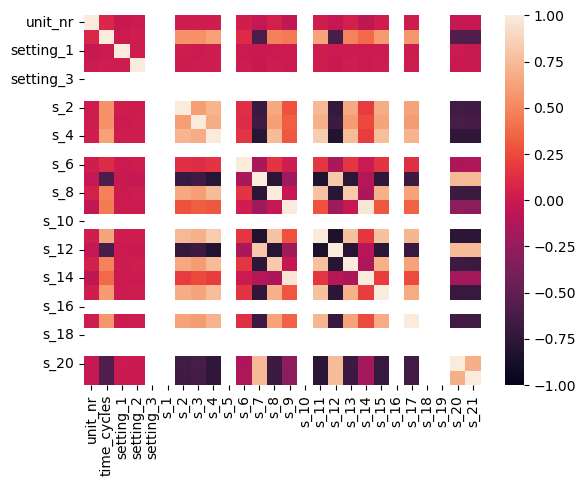

In [14]:
sns.heatmap(train001.select_dtypes(exclude=object).corr(),vmin=-1)

<Axes: >

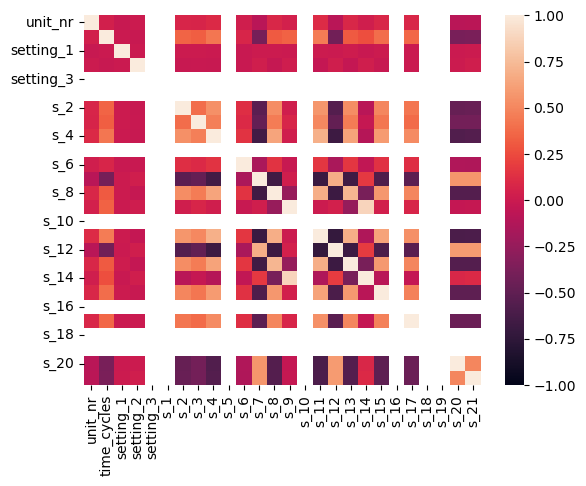

In [15]:
sns.heatmap(test001.select_dtypes(exclude=object).corr(), vmin=-1)

# Looking at both of the training and testing set, it seems like s_9 and s_14 are somewhat correlated. 

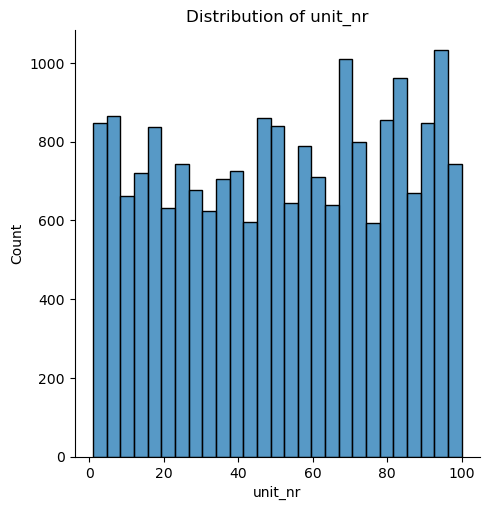

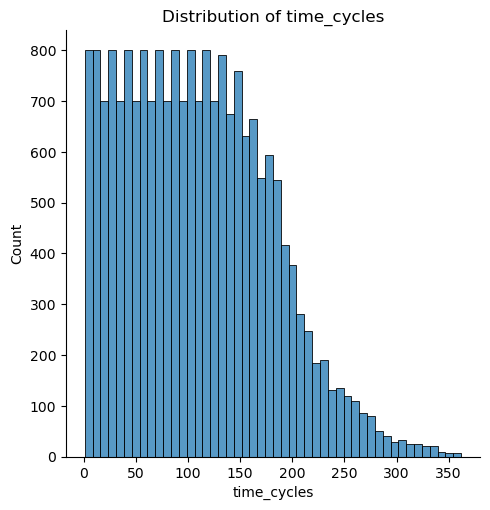

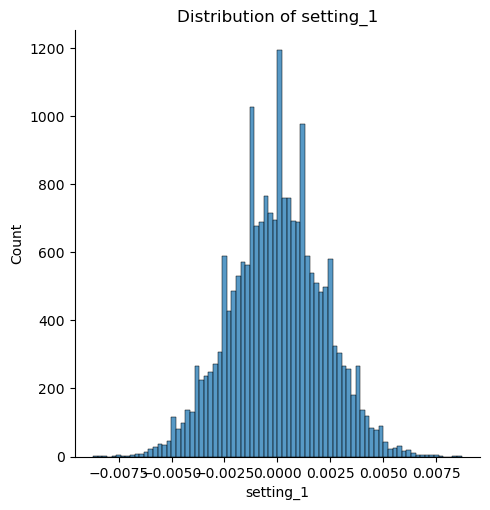

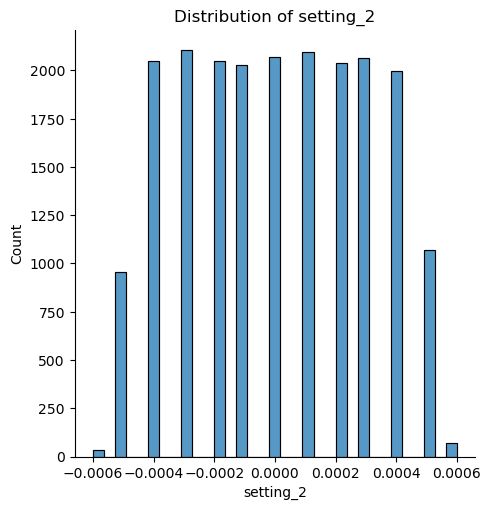

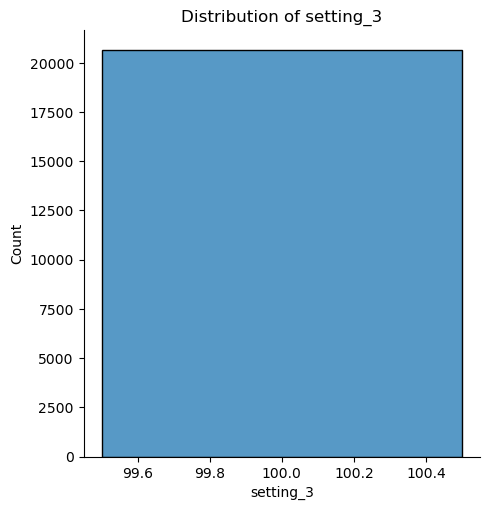

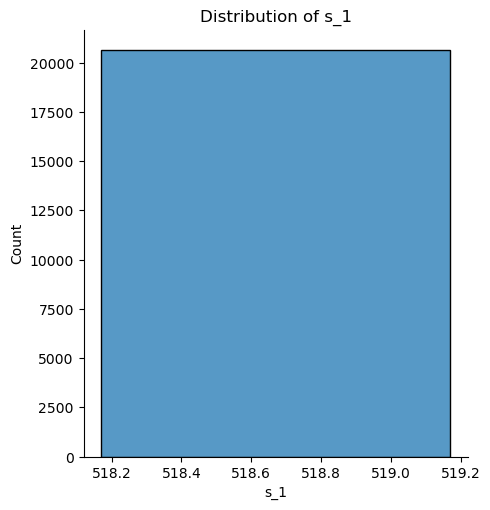

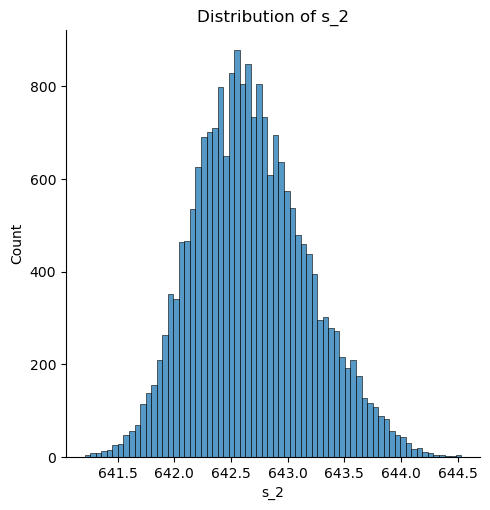

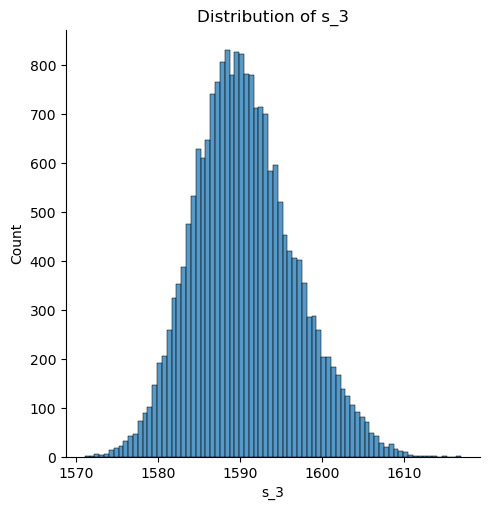

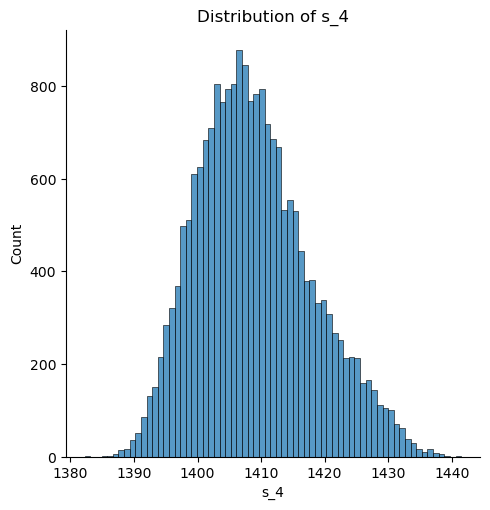

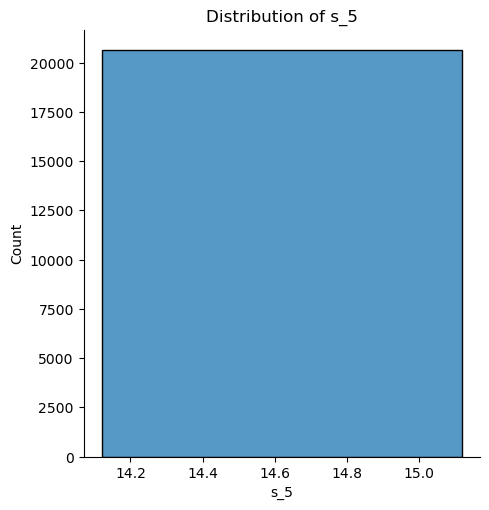

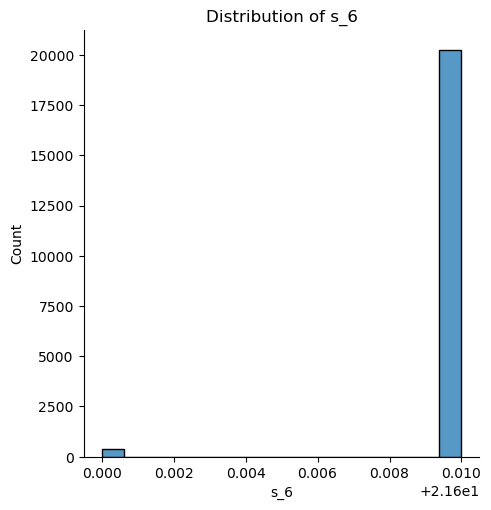

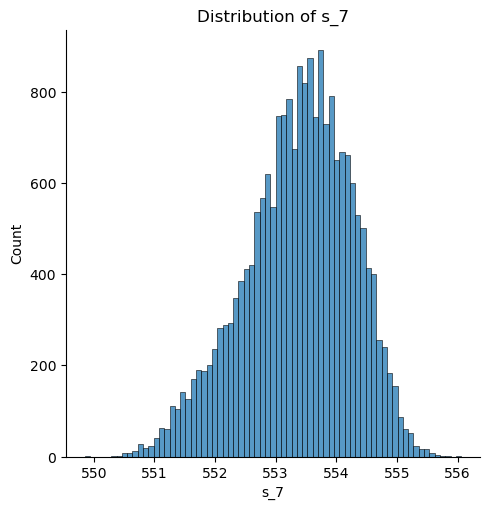

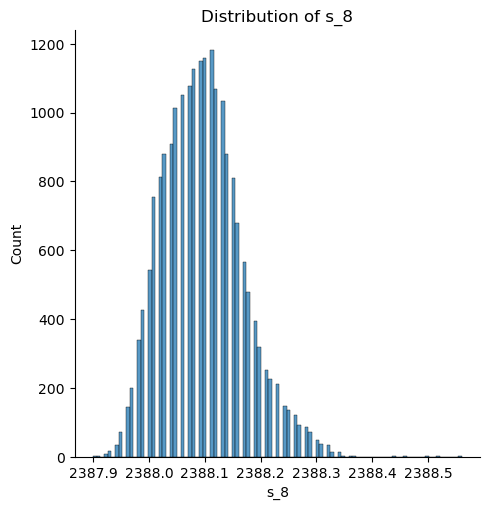

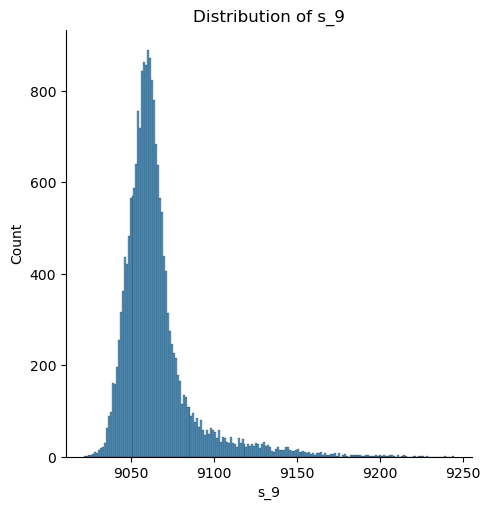

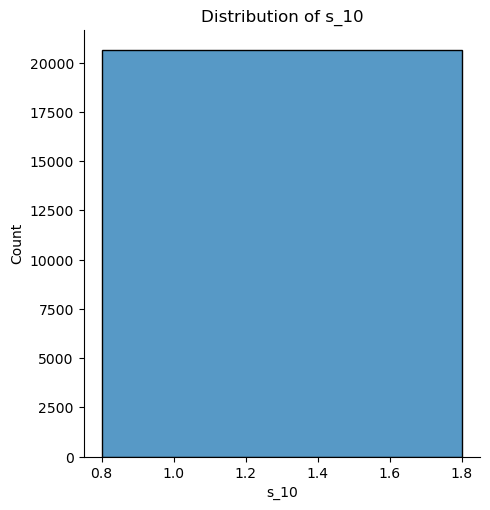

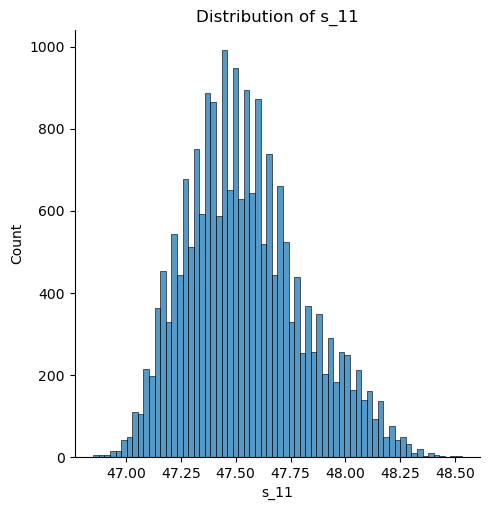

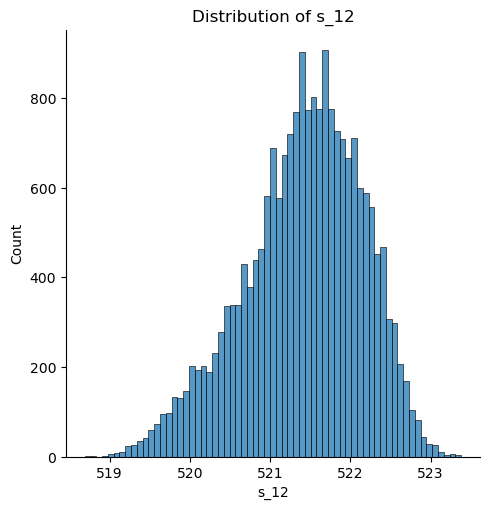

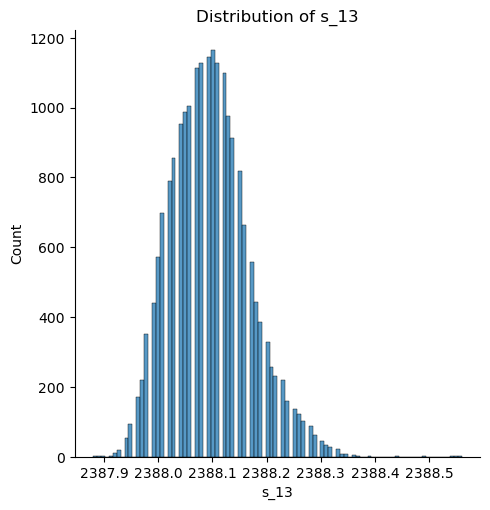

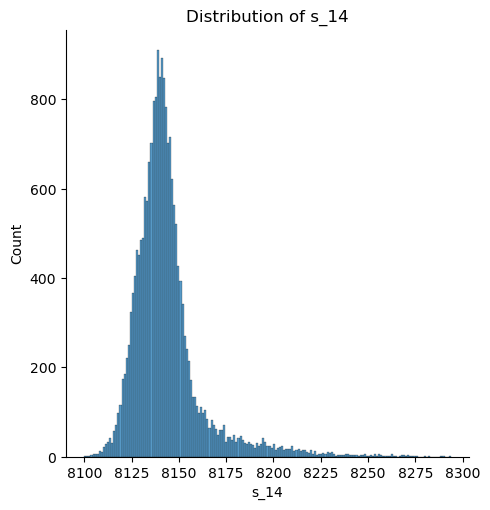

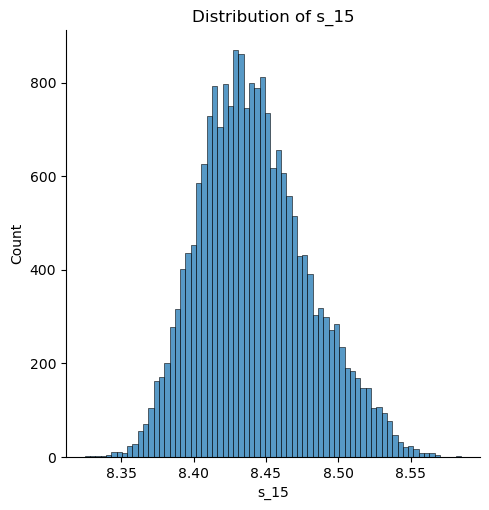

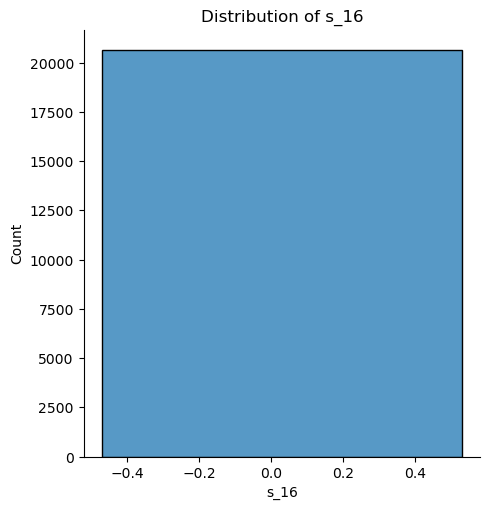

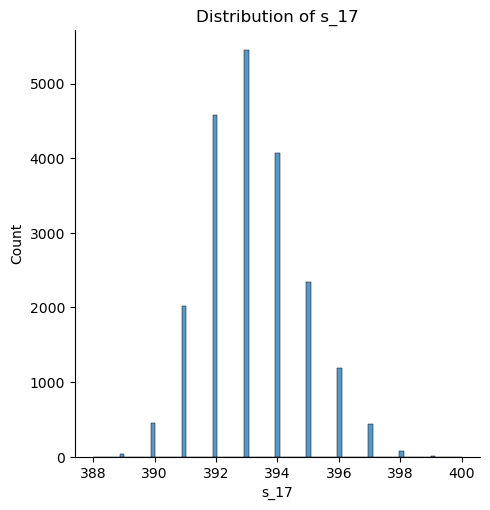

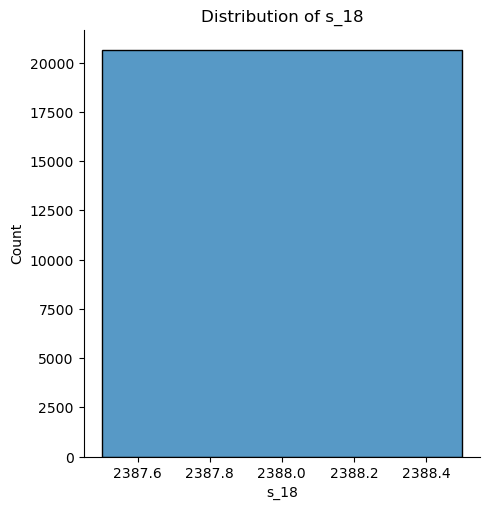

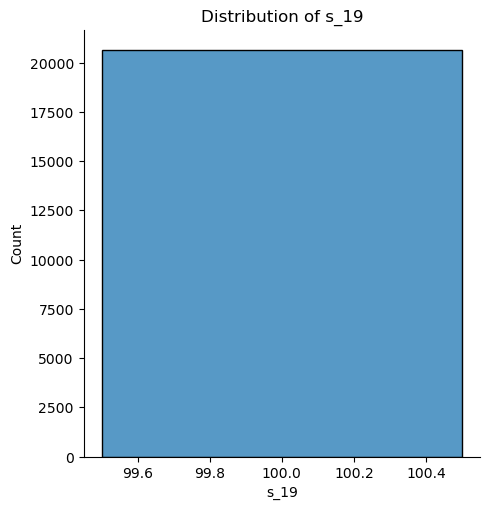

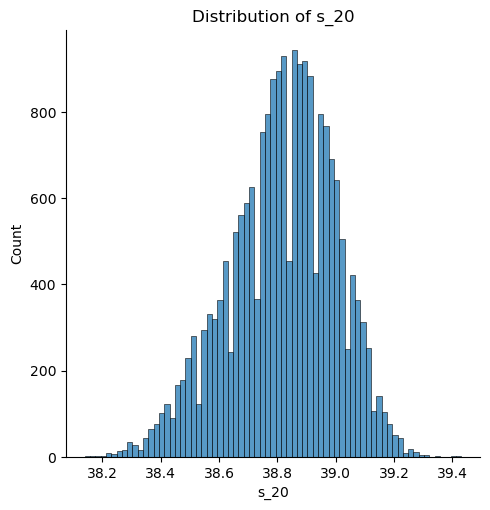

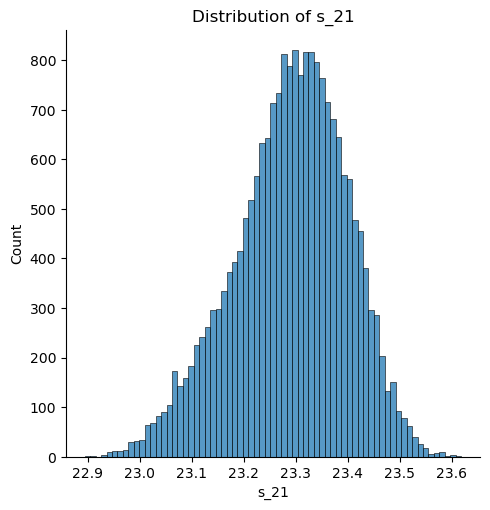

In [16]:
def distribution_plot(dataframe):
    
    for col in train001.columns:
        sns.displot(train001[col])
        plt.title(f"Distribution of {col}")
        plt.show()
        
#create the plot       
distribution_plot(train001)  

#This should give us plots for each column of the dataset. 

# The distribution of some graphs look like boxes which I will interpret as every number is basically the same in the row and therefore is insignificant. 

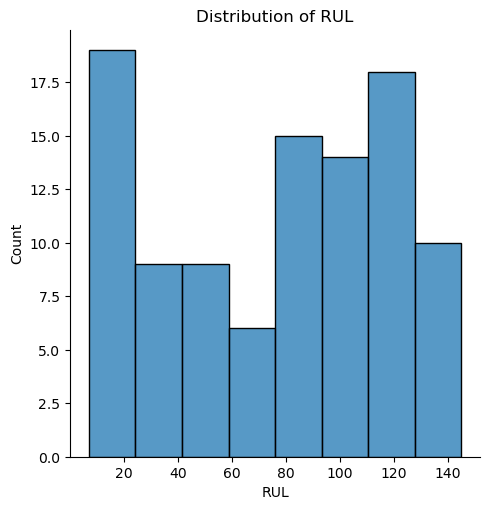

In [17]:
def distribution_plot(dataframe):
    
    for col in RUL001.columns:
        sns.displot(RUL001[col])
        plt.title(f"Distribution of {col}")
        plt.show()
        
#create the plot       
distribution_plot(RUL001) 

<Axes: >

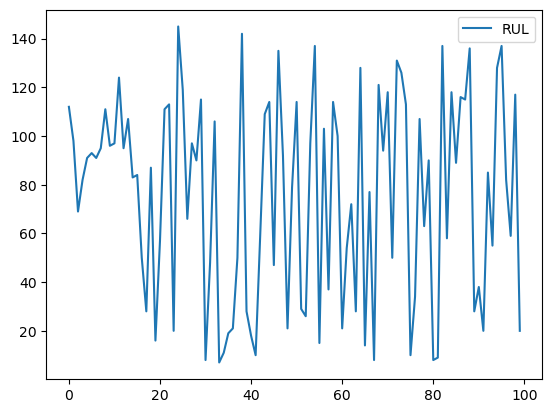

In [18]:
sns.lineplot(RUL001)

In [19]:
X_train = train001.copy()
X_test = test001.copy()

In [20]:
X_train = (X_train
    .groupby("unit_nr", group_keys=False)
    .apply(lambda x: x.assign(RUL=x["time_cycles"].max() - x["time_cycles"])))

In [22]:
X_train.head()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [23]:
X=X_train.drop(columns='RUL')
y=X_train.RUL

In [24]:
from sklearn.model_selection import train_test_split

#split the train test, here we are doing 70/30 split
X_train_X, X_test_X, y_train_Y, y_test_Y = train_test_split(X, y, test_size = 0.3, random_state = 10)

display(X_train.head())
y_train_Y.describe()

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


count    14441.000000
mean       107.654802
std         68.931893
min          0.000000
25%         51.000000
50%        102.000000
75%        155.000000
max        361.000000
Name: RUL, dtype: float64

In [25]:
X_train.drop(['s_1', 's_5', 's_10', 's_16', 's_18', 's_19', 'setting_3'], axis=1, inplace=True)
X_test.drop(['s_1', 's_5', 's_10', 's_16', 's_18', 's_19', 'setting_3'], axis=1, inplace=True)

In [26]:
X_test.drop(['setting_1','setting_2'], axis=1, inplace = True)
X_train.drop(['setting_1','setting_2'], axis=1, inplace=True)

In [27]:
X_train

,unit_nr,time_cycles,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
0,1,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_X)

pca = PCA(n_components=10)  



X_pca = pca.fit_transform(X_scaled)


print("Variance explained by each component:")
print(pca.explained_variance_ratio_)
print("\nCumulative variance explained:")
print(np.cumsum(pca.explained_variance_ratio_))

Variance explained by each component:
[0.50185091 0.11436775 0.05432244 0.0531021  0.05134669 0.05022442
 0.02296135 0.02155889 0.01929232 0.01809972]

Cumulative variance explained:
[0.50185091 0.61621866 0.6705411  0.7236432  0.77498988 0.8252143
 0.84817566 0.86973454 0.88902687 0.90712659]


In [30]:
train001

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [31]:
test001


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [32]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as sf


In [33]:
X_train_X

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
17862,88,67,0.0041,0.0004,100.0,518.67,642.32,1584.51,1406.94,14.62,...,521.70,2388.08,8148.41,8.4499,0.03,392,2388,100.0,39.04,23.4495
5128,26,19,0.0017,-0.0003,100.0,518.67,643.03,1585.33,1412.56,14.62,...,521.36,2388.14,8127.69,8.4363,0.03,394,2388,100.0,38.89,23.3620
3136,16,41,-0.0012,-0.0004,100.0,518.67,642.46,1595.11,1415.71,14.62,...,520.80,2388.17,8133.30,8.4615,0.03,393,2388,100.0,38.78,23.3384
13319,67,201,-0.0030,-0.0000,100.0,518.67,643.12,1587.94,1411.31,14.62,...,521.37,2388.07,8142.66,8.4713,0.03,392,2388,100.0,38.72,23.3057
6336,32,116,0.0007,-0.0000,100.0,518.67,643.57,1597.09,1409.36,14.62,...,521.03,2388.15,8133.01,8.4373,0.03,393,2388,100.0,38.75,23.2187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,48,108,0.0063,0.0005,100.0,518.67,642.43,1583.52,1403.39,14.62,...,521.81,2388.04,8155.53,8.4224,0.03,392,2388,100.0,38.95,23.2532
7291,37,146,-0.0001,-0.0005,100.0,518.67,643.30,1597.96,1427.11,14.62,...,520.21,2388.23,8117.20,8.4845,0.03,394,2388,100.0,38.73,23.2275
17728,87,111,-0.0007,0.0004,100.0,518.67,643.23,1594.80,1416.70,14.62,...,520.73,2388.15,8141.29,8.4560,0.03,392,2388,100.0,38.74,23.2983
7293,37,148,-0.0036,-0.0002,100.0,518.67,642.96,1596.76,1419.79,14.62,...,520.19,2388.25,8116.20,8.4762,0.03,395,2388,100.0,38.54,23.1290


In [35]:
X_reg = X
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg1 = sm.OLS(y, X_reg).fit()
pred = reg1.predict(X_reg) 
 
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RUL   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2201.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:13:14   Log-Likelihood:            -1.0516e+05
No. Observations:               20631   AIC:                         2.104e+05
Df Residuals:                   20611   BIC:                         2.105e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
unit_nr         0.2841      0.010     29.844      0.000       0.265       0.303
time_cycles    -0.4190      0.006    -71.766      0.000      -0.430      -0.408
setting_1       2.7081    126.173      0.021      0.983    -244.602     250.018
setting_2    2687.7126    941.233      2.856      0.004     842.821    4532.604
setting_3       2.1515      0.424      5.077      0.000       1.321       2.982
s_1            11.1593      2.198      5.077      0.000       6.851      15.468
s_2            -5.0405      0.896     -5.626      0.000      -6.796      -3.285
s_3            -0.2596      0.068     -3.812      0.000      -0.393      -0.126
s_4            -0.4529      0.066     -6.894      0.000      -0.582      -0.324
s_5             0.3146      0.062      5.077      0.000       0.193       0.436
s_6          -608.6274    201.585     -3.019      0.003   -1003.749    -213.506
s_7             4.2870      0.649      6.602      0.000       3.014       5.560
s_8           -26.2724      8.433     -3.116      0.002     -42.801      -9.744
s_9            -0.1577      0.053     -2.987      0.003      -0.261      -0.054
s_10            0.0280      0.006      5.077      0.000       0.017       0.039
s_11          -23.2112      2.536     -9.154      0.000     -28.181     -18.241
s_12            5.6798      0.861      6.599      0.000       3.993       7.367
s_13          -21.1192      8.313     -2.541      0.011     -37.413      -4.825
s_14           -0.1000      0.060     -1.665      0.096      -0.218       0.018
s_15          -79.8476     13.362     -5.976      0.000    -106.039     -53.656
s_16            0.0006      0.000      5.077      0.000       0.000       0.001
s_17           -0.9261      0.285     -3.249      0.001      -1.485      -0.367
s_18           51.3783     10.120      5.077      0.000      31.541      71.215
s_19            2.1515      0.424      5.077      0.000       1.321       2.982
s_20            9.3539      2.673      3.500      0.000       4.115      14.592
s_21           22.8415      4.497      5.079      0.000      14.027      31.656
==============================================================================
Omnibus:                     2198.448   Durbin-Watson:                   0.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3285.004
Skew:                           0.802   Prob(JB):                         0.00
Kurtosis:                       4.116   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
X_train

,unit_nr,time_cycles,s_2,s_3,s_4,s_6,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
0,1,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,21.61,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,21.61,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,21.61,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,21.61,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [37]:
X

,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [38]:
copy_train=X_train.copy()

In [39]:
X2 = copy_train
y2=X_train['RUL']

In [40]:
X_reg = X2
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg = sm.OLS(y2, X_reg).fit()
pred = reg.predict(X_reg) 
 
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RUL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.557e+27
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:13:15   Log-Likelihood:             4.6175e+05
No. Observations:               20631   AIC:                        -9.235e+05
Df Residuals:                   20612   BIC:                        -9.233e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.619e-10   2.96e-08     -0.009      0.993   -5.83e-08    5.77e-08
unit_nr      1.332e-15   1.13e-14      0.118      0.906   -2.09e-14    2.35e-14
time_cycles  2.359e-16    7.6e-15      0.031      0.975   -1.47e-14    1.51e-14
s_2         -7.994e-15   1.04e-12     -0.008      0.994   -2.05e-12    2.04e-12
s_3           2.22e-16   7.93e-14      0.003      0.998   -1.55e-13    1.56e-13
s_4         -8.743e-16   7.66e-14     -0.011      0.991   -1.51e-13    1.49e-13
s_6         -2.785e-12   2.35e-10     -0.012      0.991   -4.63e-10    4.57e-10
s_7          1.021e-14   7.57e-13      0.013      0.989   -1.47e-12    1.49e-12
s_8         -1.776e-15   9.82e-12     -0.000      1.000   -1.93e-11    1.93e-11
s_9          3.747e-16   6.15e-14      0.006      0.995    -1.2e-13    1.21e-13
s_11        -1.377e-14   2.96e-12     -0.005      0.996   -5.81e-12    5.79e-12
s_12        -8.882e-15      1e-12     -0.009      0.993   -1.98e-12    1.96e-12
s_13         1.581e-13   9.68e-12      0.016      0.987   -1.88e-11    1.91e-11
s_14        -3.331e-16      7e-14     -0.005      0.996   -1.37e-13    1.37e-13
s_15        -1.208e-13   1.56e-11     -0.008      0.994   -3.07e-11    3.04e-11
s_17         2.776e-15   3.32e-13      0.008      0.993   -6.48e-13    6.54e-13
s_20         -7.55e-15   3.11e-12     -0.002      0.998   -6.11e-12     6.1e-12
s_21        -1.776e-15   5.24e-12     -0.000      1.000   -1.03e-11    1.03e-11
RUL             1.0000   8.11e-15   1.23e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      661.999   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.719
Skew:                          -0.272   Prob(JB):                    1.84e-104
Kurtosis:                       2.490   Cond. No.                     1.19e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
copy_train.drop(['s_20','s_21','s_15','s_12','s_11','s_9','s_7','unit_nr','time_cycles'],axis=1, inplace=True)

In [42]:
X3=copy_train
y3=X_train['RUL']

In [43]:
X_reg = X3
X_reg = sm.add_constant(X_reg) # adding a constant
 
reg1 = sm.OLS(y, X_reg).fit()
pred = reg1.predict(X_reg) 
 
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RUL   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.716e+27
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:13:15   Log-Likelihood:             4.6091e+05
No. Observations:               20631   AIC:                        -9.218e+05
Df Residuals:                   20621   BIC:                        -9.217e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.619e-10   2.58e-08      0.010      0.992   -5.04e-08    5.09e-08
s_2         2.665e-14   1.06e-12      0.025      0.980   -2.05e-12     2.1e-12
s_3        -9.784e-16   8.09e-14     -0.012      0.990    -1.6e-13    1.58e-13
s_4        -1.166e-15   7.42e-14     -0.016      0.987   -1.47e-13    1.44e-13
s_6         2.728e-12   2.44e-10      0.011      0.991   -4.76e-10    4.81e-10
s_8        -1.279e-13   9.65e-12     -0.013      0.989    -1.9e-11    1.88e-11
s_13       -3.553e-14   9.52e-12     -0.004      0.997   -1.87e-11    1.86e-11
s_14        8.604e-16   2.37e-14      0.036      0.971   -4.55e-14    4.73e-14
s_17         1.11e-15   3.37e-13      0.003      0.997    -6.6e-13    6.62e-13
RUL            1.0000   7.27e-15   1.37e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                      222.354   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.264
Skew:                          -0.139   Prob(JB):                     1.56e-68
Kurtosis:                       3.534   Cond. No.                     7.04e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.04e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

r^2 (train): 0.5375966222798851
r^2 (test): 0.5386604505030941

MSE (train): 2197.006438262756
MSE (test): 2181.233706306888
[ 0.        -0.6720701 -0.         0.         0.         0.
 -0.        -0.        -0.        -0.        -0.         0.
 -0.        -0.        -0.        -0.         0.        -0.
 -0.        -0.        -0.        -0.         0.         0.
  0.         0.       ]


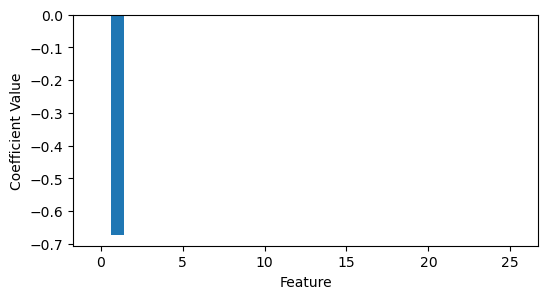

In [44]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

model = Lasso(alpha=300)
#model = Ridge(alpha=20)

model.fit(X_train_X, y_train_Y)
y_train_pred = model.predict(X_train_X)
y_test_pred = model.predict(X_test_X)

# r^2
r2_train = r2_score(y_train_Y, y_train_pred)
print(f'r^2 (train): {r2_train}')

r2_test = r2_score(y_test_Y, y_test_pred)
print(f'r^2 (test): {r2_test}')
print()

# MSE
mse_train = mean_squared_error(y_train_Y, y_train_pred)
print(f'MSE (train): {mse_train}')

mse_test = mean_squared_error(y_test_Y, y_test_pred)
print(f'MSE (test): {mse_test}')

coef = model.coef_
print(coef)

plt.figure(figsize=(6,3));
plt.bar(range(coef.shape[0]), coef);
plt.xlabel('Feature');
plt.ylabel('Coefficient Value');
#plt.ylim(-100,100)

In [45]:
##KNN

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_X, y_train_Y)

y_train_pred = model.predict(X_train_X)
y_test_pred = model.predict(X_test_X)

r2_train = r2_score(y_train_Y, y_train_pred)
print(f'r^2 (train): {r2_train}')

r2_test = r2_score(y_test_Y, y_test_pred)
print(f'r^2 (test): {r2_test}')

r^2 (train): 0.6676230318989544
r^2 (test): 0.6745998274965523


In [47]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

nNeigh = 5

#model2 = KNeighborsRegressor(n_neighbors=nNeigh)
model2 = KNeighborsRegressor(n_neighbors=nNeigh,weights='uniform')
#model2 = KNeighborsRegressor(n_neighbors=nNeigh,weights='distance')

model2.fit(X_train_X, y_train_Y)

y_train_pred_knn = model2.predict(X_train_X)
y_test_pred_knn  = model2.predict(X_test_X)

In [48]:
# r^2
r2_train = r2_score(y_train_Y, y_train_pred_knn)
print(f'r^2 (train):  {r2_train}')

r2_test = r2_score(y_test_Y, y_test_pred_knn)
print(f'r^2 (test):   {r2_test}')
print()

# MSE
mse_train = mean_squared_error(y_train_Y, y_train_pred_knn)
print(f'MSE (train):  {mse_train}')

mse_test = mean_squared_error(y_test_Y, y_test_pred_knn)
print(f'MSE (test):   {mse_test}')
print()

# RMSE
rmse_train = sqrt(mse_train)
print(f'RMSE (train): {rmse_train}')

rmse_test = sqrt(mse_test)
print(f'RMSE (test):  {rmse_test}')
print()

r^2 (train):  0.860607169957027
r^2 (test):   0.7986288406712599

MSE (train):  662.2939187036909
MSE (test):   952.0917092084006

RMSE (train): 25.7350717641061
RMSE (test):  30.855983361552433



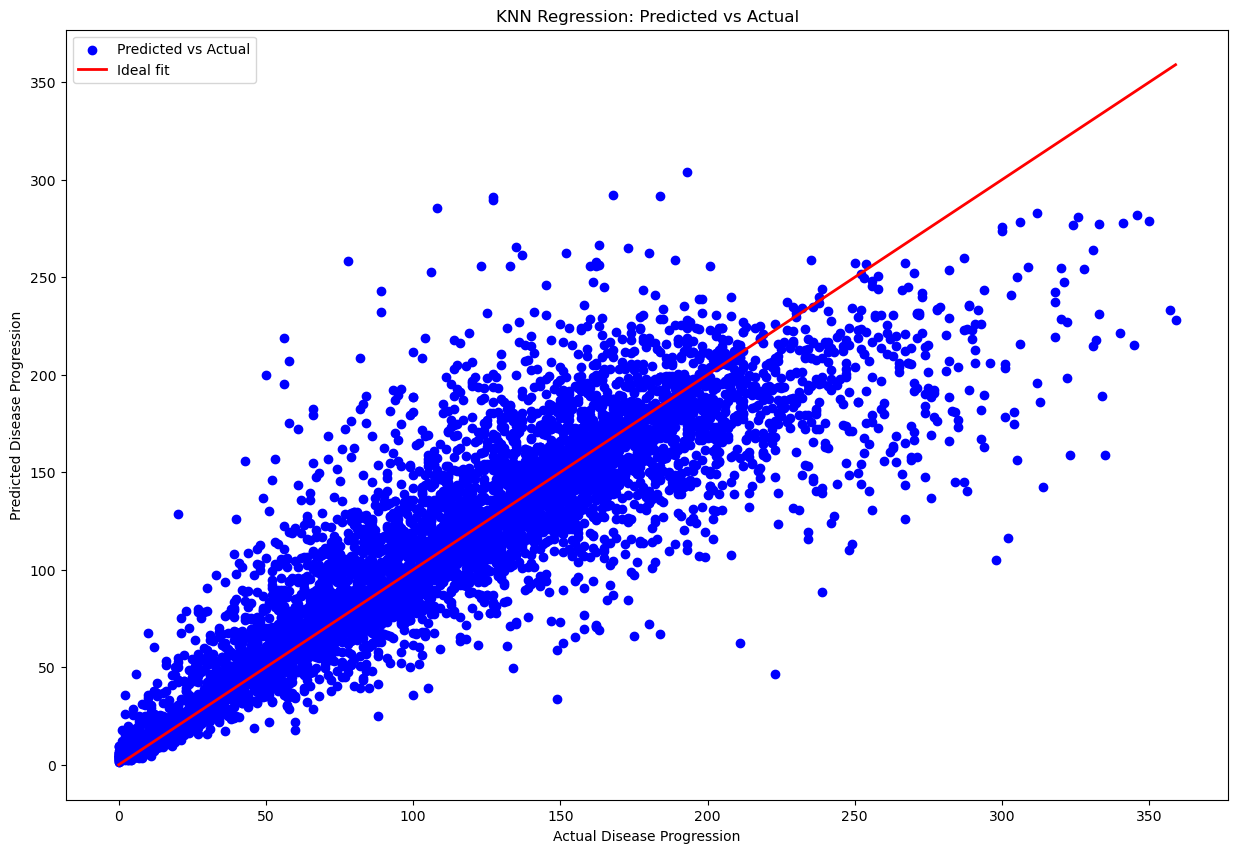

In [49]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test_Y, y_test_pred_knn, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test_Y), max(y_test_Y)], [min(y_test_Y), max(y_test_Y)], color='red', linewidth=2, label='Ideal fit')
plt.title('KNN Regression: Predicted vs Actual')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.legend()
plt.show()

In [50]:
difference =y_test_pred_knn - y_test_Y
difference2=y_test_Y - y_test_pred_knn
difference.head()
difference2.head()

10611    41.2
20215     0.8
14936    39.2
5227    -11.6
16949    41.0
Name: RUL, dtype: float64

       predicted  actual  difference  difference2
10611      133.8     175       -41.2         41.2
20215       29.2      30        -0.8          0.8
14936      182.8     222       -39.2         39.2
5227        92.6      81        11.6        -11.6
16949      161.0     202       -41.0         41.0

Difference Statistics:
count    6190.000000
mean       -0.593086
std        30.852775
min      -192.800000
25%       -10.400000
50%         0.200000
75%        10.950000
max       180.200000
Name: difference, dtype: float64


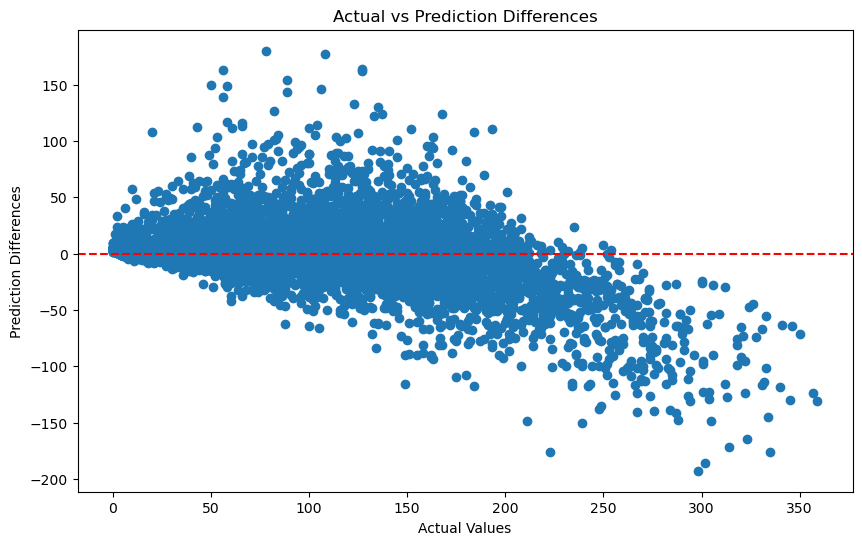

In [51]:
# Convert to DataFrame
difference_df = pd.DataFrame({
    'predicted': y_test_pred_knn,
    'actual': y_test_Y,
    'difference': difference,
    'difference2': difference2
})

# View first few rows
print(difference_df.head())

# Some useful analysis
print("\nDifference Statistics:")
print(difference_df['difference'].describe())

# Visualization of differences
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(difference_df['actual'], difference_df['difference'])
plt.xlabel('Actual Values')
plt.ylabel('Prediction Differences')
plt.title('Actual vs Prediction Differences')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [52]:
##RANDOM FORREST

In [53]:
from sklearn.ensemble import RandomForestRegressor

#model4 = RandomForestRegressor()
model4 = RandomForestRegressor(n_estimators=100, max_depth=5)
#model4 = RandomForestRegressor(n_estimators=100, min_samples_split=3)
model4.fit(X_train_X, y_train_Y)

y_train_pred_forest = model4.predict(X_train_X)
y_test_pred_forest = model4.predict(X_test_X)

In [54]:
# r^2
r2_train = r2_score(y_train_Y, y_train_pred_forest)
print(f'r^2 (train):  {r2_train}')

r2_test = r2_score(y_test_Y, y_test_pred_forest)
print(f'r^2 (test):   {r2_test}')
print()

# MSE
mse_train = mean_squared_error(y_train_Y, y_train_pred_forest)
print(f'MSE (train):  {mse_train}')

mse_test = mean_squared_error(y_test_Y, y_test_pred_forest)
print(f'MSE (test):   {mse_test}')
print()

# RMSE
rmse_train = sqrt(mse_train)
print(f'RMSE (train): {rmse_train}')

rmse_test = sqrt(mse_test)
print(f'RMSE (test):  {rmse_test}')
print()

r^2 (train):  0.761252500180315
r^2 (test):   0.7583576635397573

MSE (train):  1134.3554556395854
MSE (test):   1142.495608132045

RMSE (train): 33.68019381831977
RMSE (test):  33.80082259549381



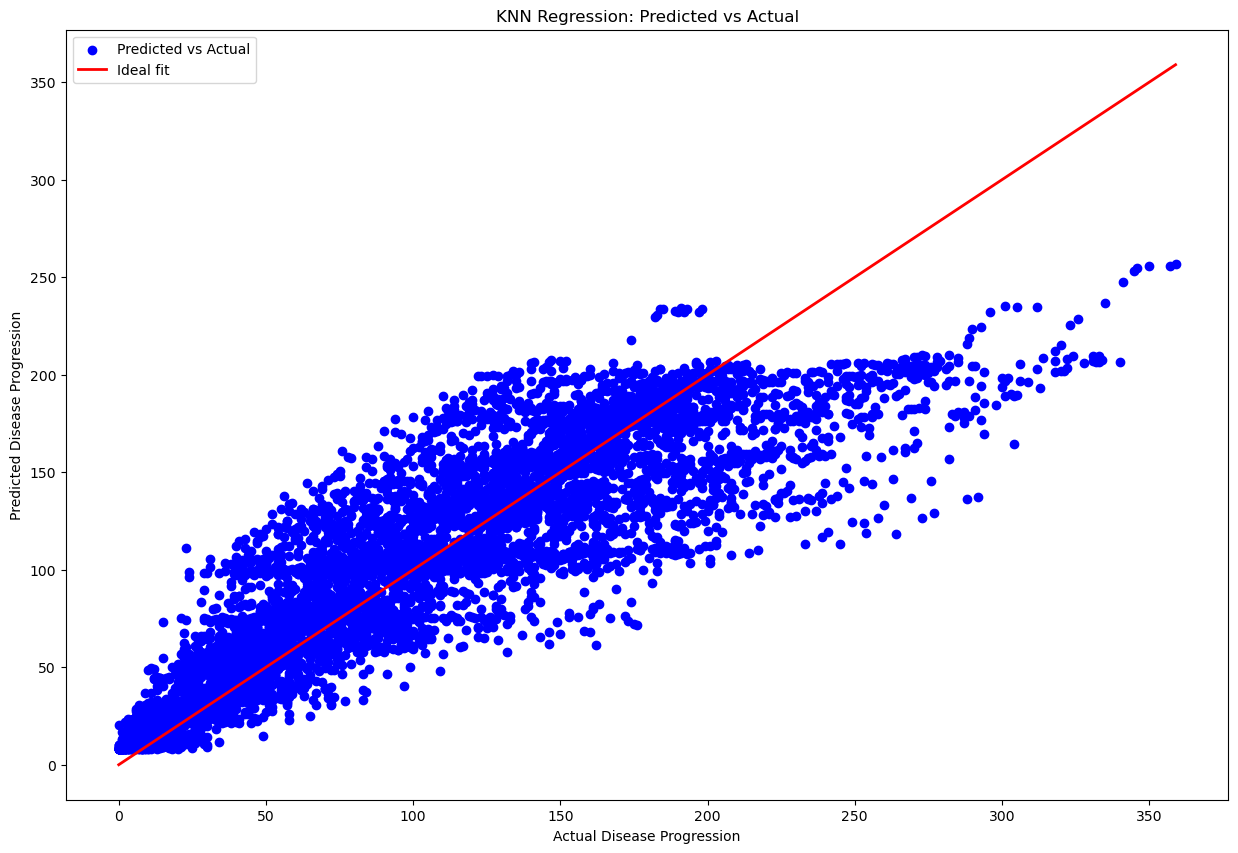

In [55]:
plt.figure(figsize=(15, 10))
plt.scatter(y_test_Y, y_test_pred_forest, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test_Y), max(y_test_Y)], [min(y_test_Y), max(y_test_Y)], color='red', linewidth=2, label='Ideal fit')
plt.title('KNN Regression: Predicted vs Actual')
plt.xlabel('Actual Disease Progression')
plt.ylabel('Predicted Disease Progression')
plt.legend()
plt.show()

In [56]:
diff01 =y_test_pred_forest - y_test_Y
diff001=y_test_Y - y_test_pred_forest
diff01.head()
diff001.head()

10611    41.587059
20215   -25.973012
14936    25.524784
5227      6.016199
16949    58.325970
Name: RUL, dtype: float64

       predicted  actual     diff01    diff001
10611      133.8     175 -41.587059  41.587059
20215       29.2      30  25.973012 -25.973012
14936      182.8     222 -25.524784  25.524784
5227        92.6      81  -6.016199   6.016199
16949      161.0     202 -58.325970  58.325970

Difference Statistics:
count    6190.000000
mean        0.825928
std        33.793460
min       -87.940083
25%       -18.228897
50%        -3.499292
75%        14.412719
max       154.671806
Name: diff001, dtype: float64


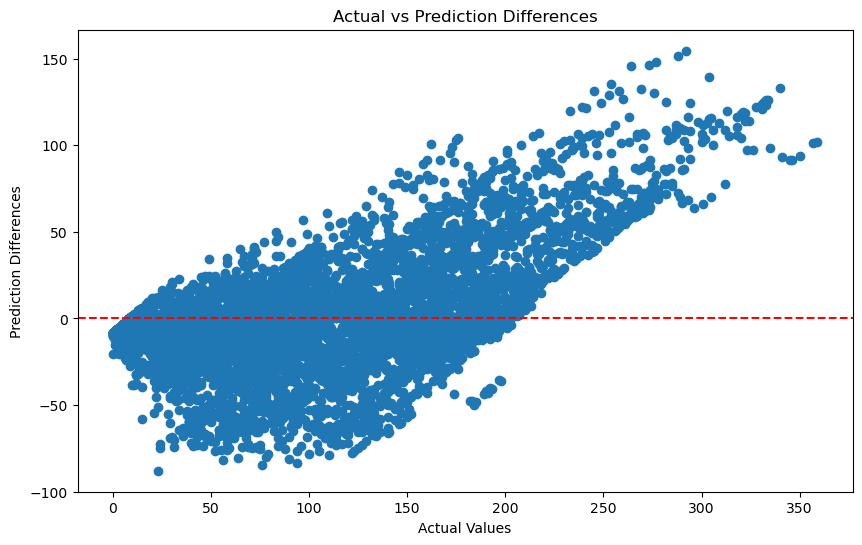

In [57]:
# Convert to DataFrame
diff_df = pd.DataFrame({
    'predicted': y_test_pred_knn,
    'actual': y_test_Y,
    'diff01': diff01,
    'diff001': diff001
})

# View first few rows
print(diff_df.head())

# Some useful analysis
print("\nDifference Statistics:")
print(diff_df['diff001'].describe())

# Visualization of differences
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(diff_df['actual'], diff_df['diff001'])
plt.xlabel('Actual Values')
plt.ylabel('Prediction Differences')
plt.title('Actual vs Prediction Differences')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()